In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import pickle
from joblib import dump, load
from preprocessing import *
from models import *
from sklearn.cluster import KMeans
from tensorflow.keras import models
import xgboost as xgb

from sklearn.decomposition import PCA, KernelPCA
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor


import warnings
warnings.filterwarnings('ignore')

In [68]:
def get_estimator(estimator):
    if estimator == 'booster':
        e = xgb.XGBModel(objective='reg:squarederror',
                                 max_depth=11,
                                 subsample=0.5,
                                 colsample_bytree=0.5,
                                 learning_rate=0.1,
                                 n_estimators=100,
                                 silent=1,
                                 seed=42)
                
    elif estimator == 'xtrees':
        e = ExtraTreesRegressor(n_estimators=100,
                                      random_state=0,
                                      min_samples_leaf=20,
                                      n_jobs=-1)
    elif estimator == 'rf':
        e=RandomForestRegressor(n_estimators=100,
                                        random_state=1,
                                        min_samples_leaf=10,
                                        n_jobs=-1)
    return e

def get_trained_estimator(estimator, X, y):
    e = get_estimator(estimator)
    e.fit(X,y)
    return e

def get_all_models(estimators, power_lines, X_list, train_all, feature_dict=None, feat_no=None):
    models = {}
    for w in power_lines:
        models[w] = []
        features = list(X_list[0].columns)
        if feature_dict is not None:
            features=feature_dict[w]
        for estimator in estimators:
            for X in X_list:
                e=get_trained_estimator(estimator,
                                         X[features[:feat_no]].astype(float),
                                         train_all.loc[X.index][w].astype(float))
                print(estimator, w)
                models[w].append(e)
    return models

In [69]:
X_train, X_test, y_train, y_test = generate_train_data("chrono")
X_train = add_delays(X_train, 4)
train_all = import_data()

features = X_train.columns
power_lines = y_train.columns

> Importing  data/train_29-12-2020(13:51:27).p
> Importing  data/train_29-12-2020(13:51:27).p


In [70]:
try:
    # Check if pickle is already there
    importances = pickle.load( open( "immportances.pickle", "rb" ) ) 
except IOError:
    # Get Extra Trees models, one per power line, just to see feature importances
    models=get_all_models(['xtrees'], power_lines, [X_train[features]], train_all)
    imp_per_w = {}
    
    # Get importances
    for i in power_lines:
        imp = models[i][0].feature_importances_
        imp_per_w[i] = []
        indices = np.argsort(imp)[::-1]
        for f in range(X_train[features].shape[1]):
            imp_per_w[i].append(list(X_train.columns)[indices[f]])
            
    # Sorted Feature importances are dumped to a pickle file
    pickle.dump( imp_per_w, open( "importances.pickle", "wb" ) )
    importances = imp_per_w

xtrees NPWD2372
xtrees NPWD2401
xtrees NPWD2402
xtrees NPWD2451
xtrees NPWD2471
xtrees NPWD2472
xtrees NPWD2481
xtrees NPWD2482
xtrees NPWD2491
xtrees NPWD2501
xtrees NPWD2531
xtrees NPWD2532
xtrees NPWD2551
xtrees NPWD2552
xtrees NPWD2561
xtrees NPWD2562
xtrees NPWD2691
xtrees NPWD2692
xtrees NPWD2721
xtrees NPWD2722
xtrees NPWD2742
xtrees NPWD2771
xtrees NPWD2791
xtrees NPWD2792
xtrees NPWD2801
xtrees NPWD2802
xtrees NPWD2821
xtrees NPWD2851
xtrees NPWD2852
xtrees NPWD2871
xtrees NPWD2872
xtrees NPWD2881
xtrees NPWD2882


In [71]:
pd.DataFrame.from_dict(importances).head(20).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
NPWD2372,ttp.ewma,pair4.ewma,pair11.ewma,sa.diff,ttp,APSF.diff,APSF,D4PNPO.diff,NADIR.diff,ttp.diff,pair_c_9,sa.ewma,MAPO.ewma,conjuction,sunmarsearthangle_deg2,sunmarsearthangle_deg2.ewma,D4PNPO,APSF.ewma,ut.ewma,NADIR
NPWD2401,ut.diff,APSF.ewma,eclipseduration_min.ewma,eclipseduration_min,pair_c_12.ewma,pair12.ewma,solarconstantmars,ut,APSF,ut.ewma,sunmarsearthangle_deg2.ewma,solarconstantmars.ewma,sunmarsearthangle_deg2,ATTT.ewma,AAAA.ewma,pair12,pair_c_12,sunmarsearthangle_deg.ewma,ATMB.ewma,UMBRA_time3.ewma
NPWD2402,APSF,pair_c_12,APSF.ewma,pair11,pair13.diff,pair11.ewma,pair4.ewma,pair12,PENS.diff,pair4,D4PNPO,PENS,UMBRA.ewma,sz.diff,pair12.diff,PENUMBRA_time3.ewma,ut.ewma,PENUMBRA.diff,pair12.ewma,eclipseduration_min
NPWD2451,sz.ewma,sunmarsearthangle_deg.ewma,sunmarsearthangle_deg,solarconstantmars,solarconstantmars.ewma,UMBRA_season.ewma,UMBRA_season,eclipseduration_min.ewma,occultationduration_min,ttp.diff,sunmarsearthangle_deg2,sx.ewma,eclipseduration_min,sunmarsearthangle_deg2.ewma,flagcomms.ewma,pair17.ewma,MAINTENANCE.ewma,UMBRA.ewma,ut.ewma,pair_c_17.ewma
NPWD2471,solarconstantmars.ewma,solarconstantmars,sx.ewma,sunmarsearthangle_deg,conjuction,sunmarsearthangle_deg.ewma,sz.ewma,MAINTENANCE.ewma,sunmarsearthangle_deg2.ewma,sunmarsearthangle_deg2,ut,flagcomms.ewma,ut.ewma,MAINTENANCE.diff,ttp.ewma,AMMM.ewma,EARTH.ewma,D4PNPO.ewma,sy.ewma,AAAA.ewma
NPWD2472,ut,ut.ewma,pair_c_15.ewma,pair15.ewma,solarconstantmars.ewma,pair_c_15,solarconstantmars,sunmarsearthangle_deg2,occultationduration_min.ewma,sunmarsearthangle_deg.ewma,pair15,sunmarsearthangle_deg2.ewma,sx.ewma,occultationduration_min,sunmarsearthangle_deg,sz.ewma,pair2,eclipseduration_min.ewma,eclipseduration_min,MOCE.ewma
NPWD2481,AHHH.diff,ATTT.diff,AHHH,sy,sy.diff,sa.diff,AHHH.ewma,sunmarsearthangle_deg2.ewma,AOOO.ewma,sa,solarconstantmars,sunmarsearthangle_deg2,pair_c_13.ewma,sunmarsearthangle_deg,UMBRA.ewma,sz.ewma,sx.diff,pair14,solarconstantmars.ewma,AOOO
NPWD2482,ut.diff,APSF.ewma,sunmarsearthangle_deg,pair_c_12.ewma,eclipseduration_min,pair12.ewma,sunmarsearthangle_deg.ewma,eclipseduration_min.ewma,sunmarsearthangle_deg2.ewma,solarconstantmars.ewma,solarconstantmars,ATTT.ewma,APSF,ut,sunmarsearthangle_deg2,ut.ewma,D4PNPO.ewma,pair_c_12,AAAA.ewma,ATMB.ewma
NPWD2491,ttp,AHHH.diff,ttp.diff,AMMM.ewma,AMMM,AHHH,solarconstantmars,sunmarsearthangle_deg2,sunmarsearthangle_deg2.ewma,pair4.ewma,MAPO.ewma,solarconstantmars.ewma,conjuction,pair_c_9,pair9.diff,pair9,pair11.ewma,pair_c_9.diff,eclipseduration_min,MPER.ewma
NPWD2501,solarconstantmars.ewma,solarconstantmars,sunmarsearthangle_deg,sunmarsearthangle_deg.ewma,sx.ewma,sunmarsearthangle_deg2.ewma,ut.ewma,ut,sunmarsearthangle_deg2,MAINTENANCE.ewma,sz.ewma,flagcomms.ewma,ttp.ewma,EARTH.ewma,eclipseduration_min.ewma,AOOO,MAINTENANCE.diff,AMMM,eclipseduration_min,D4PNPO.ewma


In [72]:
models=get_all_models(['xtrees','booster'], power_lines, [X_train], train_all, importances, 40)

xtrees NPWD2372
[15:17:56] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


booster NPWD2372
xtrees NPWD2401
[15:18:01] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


booster NPWD2401
xtrees NPWD2402
[15:18:06] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  ve

### Predictions

In [73]:
X_test = add_delays(X_test, 4)


In [74]:
predictions  = {}
submission = y_test.copy()
submission.index = y_test.index
for w in power_lines:
    predictions[w] = X_test[['ut']]
    for idx, est in enumerate(models[w]):
        m = "model_%d"%idx
        predictions[w][m]=est.predict(X_test[importances[w][:40]].astype(float))
    submission[w] = predictions[w][[x for x in predictions[w].columns if 'model' in x]].mean(axis=1)

timestamp = d.datetime.now().strftime("%d-%m-%Y(%H:%M:%S)")
submission.to_pickle(f"results/predictions_{timestamp}.p")

In [75]:
challenge_metric = np.sqrt(np.mean(np.mean((y_test - submission)**2)))
# print(y_test.shape, predict.shape)
err = np.mean(np.abs(y_test-submission)/y_test) * 100

In [76]:
power_ids = y_train.columns[y_train.columns.str.match("NPWD")]

err_sorted = err.sort_values(ascending = False)
err_sorted_descend = err[np.argsort(err)]

power_sorted = power_ids[np.argsort(err)]
power_formated = [f"{power_sorted[i]}  {err_sorted_descend[i]:.4f}%" for i in range(len(err))]

In [77]:
def print_global_perf(err):
    sort = list(np.argsort(err))
    fig, ax = plt.subplots(2,1, gridspec_kw={'height_ratios': [10, 30]}, figsize=(10,15))  
    
    fig.suptitle("Log of relative error (%)", fontsize=14)
    
    ax[0].boxplot(np.log(err), vert=False)
    ax[0].annotate(err.describe().to_string(), (1.05, 0.2), xycoords='axes fraction', size=12)
    ax[0].annotate(f"Challenge metric value: {challenge_metric:.4f}", (1.05, 1), xycoords='axes fraction', size=12)
    
    ax[1].scatter(np.log(err[sort]), power_ids[sort])
    ax[1].grid(True)
    ax[1].annotate(err_sorted.to_string(), (1.05, 0.1), xycoords='axes fraction', size=12)
    
    plt.show()

In [78]:
np.sqrt(np.mean(np.mean((y_test - submission)**2)))

0.09459695931828623

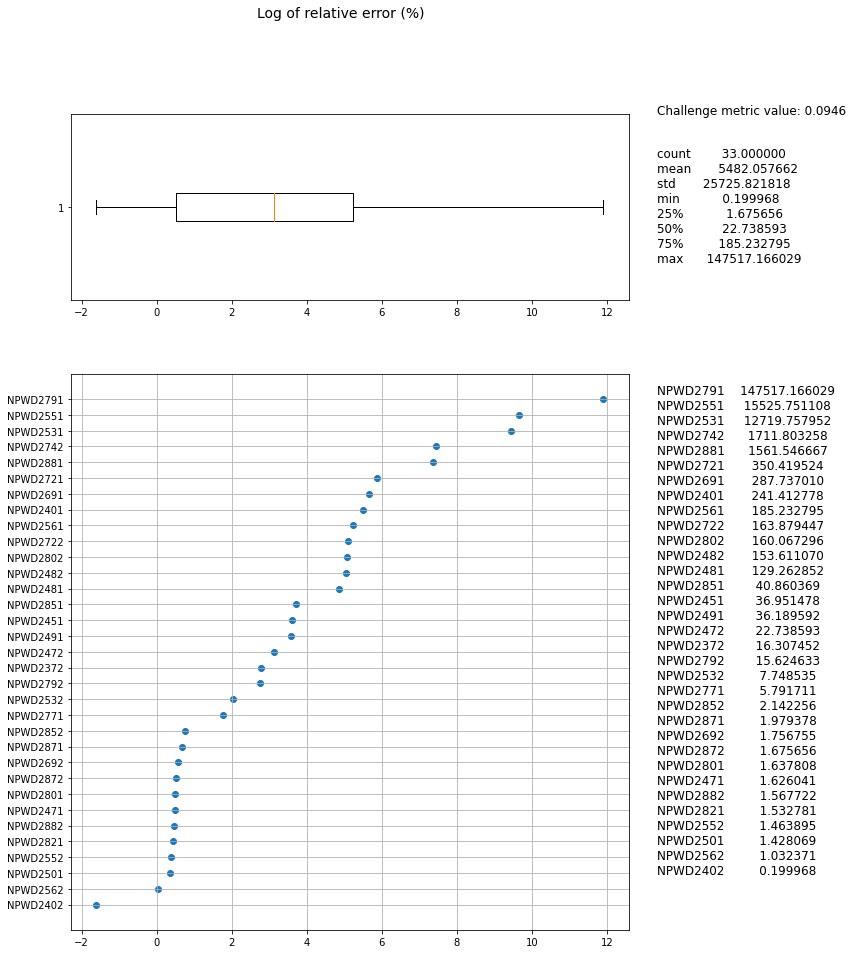

In [79]:
print_global_perf(err)

In [54]:
submission

,NPWD2372,NPWD2401,NPWD2402,NPWD2451,NPWD2471,NPWD2472,NPWD2481,NPWD2482,NPWD2491,NPWD2501,...,NPWD2792,NPWD2801,NPWD2802,NPWD2821,NPWD2851,NPWD2852,NPWD2871,NPWD2872,NPWD2881,NPWD2882
2012-05-28 01:00:00,0.196361,0.088554,0.231969,0.551888,0.087786,0.088033,0.087791,0.088877,0.279815,0.091463,...,0.087885,0.088442,0.167201,0.091944,0.255251,0.087608,0.087606,0.087789,0.196829,0.089957
2012-05-28 02:00:00,0.200444,0.088555,0.231945,0.566213,0.087787,0.088017,0.087792,0.088881,0.276854,0.091462,...,0.087880,0.088442,0.190543,0.091949,0.295857,0.087610,0.087606,0.087788,0.231395,0.089958
2012-05-28 03:00:00,0.205422,0.089503,0.231892,0.640455,0.087787,0.088017,0.087793,0.088884,0.278001,0.091471,...,0.087872,0.088446,0.263127,0.091942,0.332858,0.087610,0.087607,0.087789,0.249662,0.089956
2012-05-28 04:00:00,0.204917,0.089502,0.231857,0.666876,0.087787,0.088009,0.088792,0.088881,0.274829,0.091460,...,0.087871,0.088445,0.181036,0.091955,0.265205,0.087611,0.087607,0.087789,0.250150,0.089952
2012-05-28 05:00:00,0.208310,0.089502,0.231922,0.638423,0.087784,0.088008,0.088792,0.088880,0.283375,0.091466,...,0.087877,0.088443,0.170249,0.091936,0.246857,0.087609,0.087605,0.087789,0.211150,0.089952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-04-13 19:00:00,0.185013,0.089505,0.231909,0.718163,0.087787,0.088295,0.087793,0.092103,0.233140,0.091474,...,0.088089,0.088444,0.131275,0.091939,0.205391,0.087611,0.087607,0.087789,0.096367,0.089975
2014-04-13 20:00:00,0.225768,0.089507,0.231937,0.743365,0.087787,0.088306,0.087793,0.092106,0.305889,0.091475,...,0.088084,0.088446,0.172048,0.091939,0.219980,0.087611,0.087607,0.087789,0.164891,0.089975
2014-04-13 21:00:00,0.198637,0.089506,0.231997,0.718008,0.087786,0.088323,0.087793,0.092107,0.259557,0.091477,...,0.088119,0.088448,0.240838,0.091948,0.297223,0.087629,0.087607,0.087791,0.154261,0.089974
2014-04-13 22:00:00,0.197911,0.089506,0.231957,0.807451,0.087787,0.088304,0.087806,0.092106,0.230803,0.091470,...,0.088116,0.088449,0.247421,0.091945,0.295310,0.087610,0.087607,0.087792,0.141317,0.089970
